In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, LassoLars
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, d2_absolute_error_score
from sklearn.metrics import max_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance


In [100]:
def generate_prediction(classifier_model, train_x, train_y, test_x):
    trained_model = classifier_model.fit(train_x, train_y)
    prediction = trained_model.predict(test_x)

    return prediction


def plot_graph(stock_df, test_x, test_y, prediction_y, model_name):    
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)
    test_x['date'] = stock_df['date']

    ax.plot(stock_df['date'], stock_df['close'], label='actual', c='b', linewidth=1)
    ax.plot(test_x['date'], test_y, label='test', c='r', linewidth=1)
    ax.plot(test_x['date'], prediction_y, label='prediction', c='g', linewidth=1)

    ax.xaxis.set_major_locator(mticker. MultipleLocator(16))

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    plt.tight_layout()
    plt.legend()
    plt.show()


regression_metrics = [r2_score, explained_variance_score, d2_absolute_error_score, max_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_poisson_deviance]
metric_names = ['R2 Score', 'Explained Variance Score', 'D2 Absolute Error Score', 'Max Error', 'Mean Absolute Error', 'Mean Squared Error', 'Mean Absolute Percentage Error', 'Mean Poisson Deviance']

def calculate_metrics(y_true, y_pred, model_name):

    print(f"---- Model: {model_name} ----")
    
    for idx, metric in enumerate(regression_metrics):
        metric_result = metric(y_true, y_pred)
        print(f"{metric_names[idx]:30} {metric_result}")

    print("----------------------\n\n")


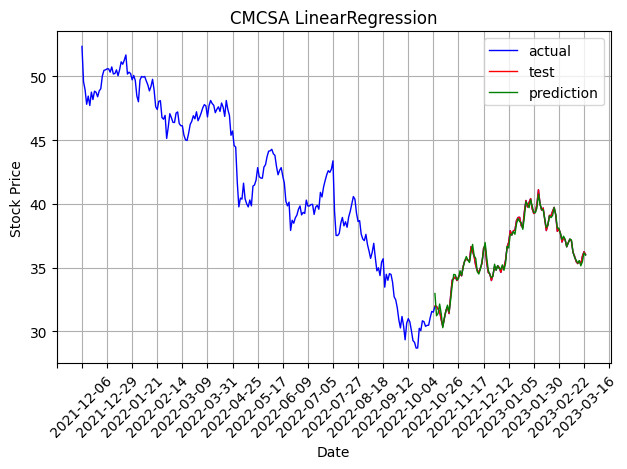

---- Model: CMCSA LinearRegression ----
R2 Score                       0.9895918240947806
Explained Variance Score       0.9895952489318421
D2 Absolute Error Score        0.9093082125096545
Max Error                      0.9882827600372721
Mean Absolute Error            0.18503929548674497
Mean Squared Error             0.06469004023900848
Mean Absolute Percentage Error 0.005203014176135514
Mean Poisson Deviance          0.0018561777299206292
----------------------




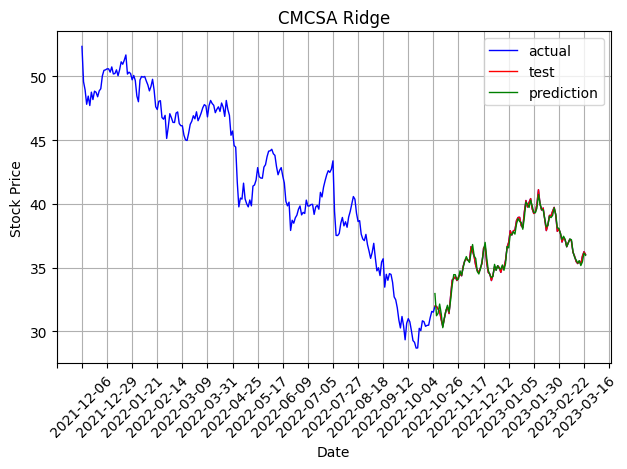

---- Model: CMCSA Ridge ----
R2 Score                       0.9895199173591736
Explained Variance Score       0.9895279072945032
D2 Absolute Error Score        0.9079486583406939
Max Error                      0.9864943028062214
Mean Absolute Error            0.1878132064720956
Mean Squared Error             0.06513696289502745
Mean Absolute Percentage Error 0.005271935814331538
Mean Poisson Deviance          0.0018660583556021316
----------------------




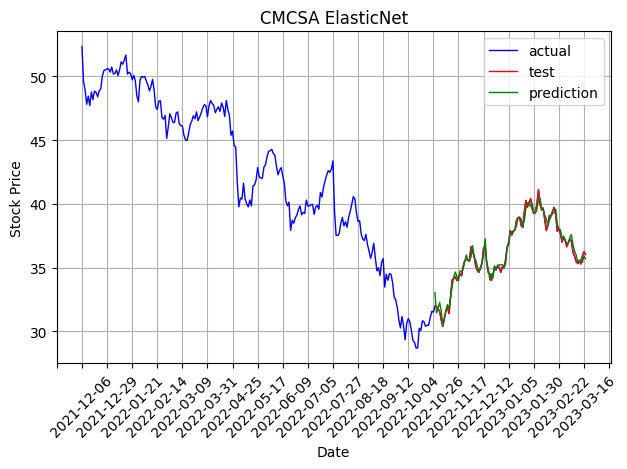

---- Model: CMCSA ElasticNet ----
R2 Score                       0.9776657440672062
Explained Variance Score       0.9784429938451913
D2 Absolute Error Score        0.8565515926418401
Max Error                      1.074092882518812
Mean Absolute Error            0.2926791164974579
Mean Squared Error             0.13881432521487463
Mean Absolute Percentage Error 0.008109471199186626
Mean Poisson Deviance          0.0038468549796351038
----------------------




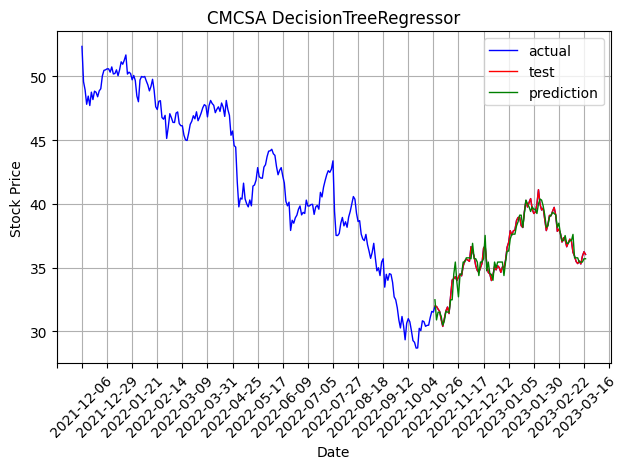

---- Model: CMCSA DecisionTreeRegressor ----
R2 Score                       0.9581671514552836
Explained Variance Score       0.9581704619971663
D2 Absolute Error Score        0.8124399979788794
Max Error                      1.5599999999999952
Mean Absolute Error            0.3826804123711337
Mean Squared Error             0.2600041237113401
Mean Absolute Percentage Error 0.010614267910574666
Mean Poisson Deviance          0.007279634956678781
----------------------




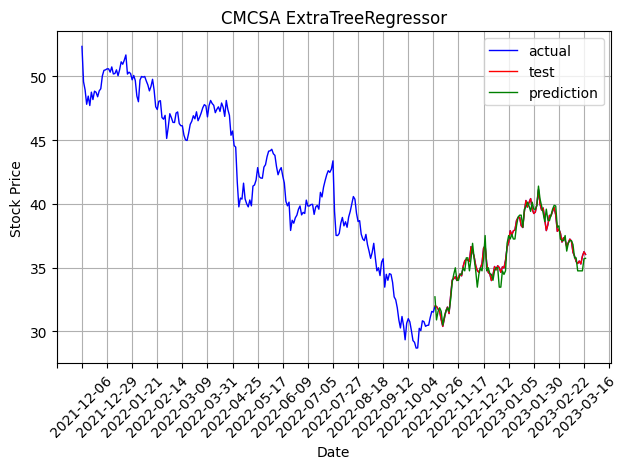

---- Model: CMCSA ExtraTreeRegressor ----
R2 Score                       0.9537056046116341
Explained Variance Score       0.9550418870586681
D2 Absolute Error Score        0.7966752564296904
Max Error                      1.6799999999999997
Mean Absolute Error            0.41484536082474194
Mean Squared Error             0.28773402061855624
Mean Absolute Percentage Error 0.01148652821939524
Mean Poisson Deviance          0.00804158081247679
----------------------




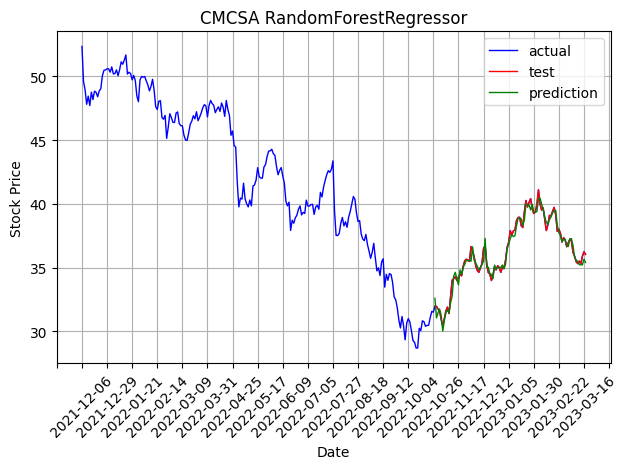

---- Model: CMCSA RandomForestRegressor ----
R2 Score                       0.9745908524445612
Explained Variance Score       0.9755619009741608
D2 Absolute Error Score        0.8511389015208912
Max Error                      1.2423000000000144
Mean Absolute Error            0.3037226804123756
Mean Squared Error             0.15792573000000557
Mean Absolute Percentage Error 0.008403222566611681
Mean Poisson Deviance          0.004406652955205063
----------------------




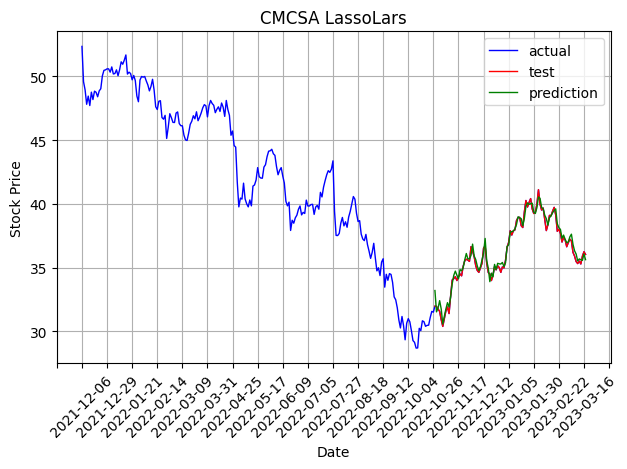

---- Model: CMCSA LassoLars ----
R2 Score                       0.9768363993848802
Explained Variance Score       0.9802312191680601
D2 Absolute Error Score        0.8500161218908704
Max Error                      1.225737285886737
Mean Absolute Error            0.30601349810905004
Mean Squared Error             0.1439689595485212
Mean Absolute Percentage Error 0.008565301356753994
Mean Poisson Deviance          0.0040485118623312935
----------------------




In [101]:

ticker_symbol = 'CMCSA'

candle_csv_file_path = './data/candlestick_data.csv'

all_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol]

stock_analysis_data_df = company_stock_data_df.drop('date', axis=1).drop('symbol', axis = 1).drop('unix_time', axis=1)

data_x = stock_analysis_data_df.loc[:,stock_analysis_data_df.columns != 'close' ]
data_y = stock_analysis_data_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

models = [LinearRegression(), Ridge(), ElasticNet(), DecisionTreeRegressor(), ExtraTreeRegressor(), RandomForestRegressor(), LassoLars()]
prediction_list = []

for model in models:
    prediction = generate_prediction(model, x_train, y_train, x_test)
    prediction_list.append([prediction, ticker_symbol + " " + str(model)[:-2]])

for prediction in prediction_list:
    plot_graph(company_stock_data_df, x_test, y_test, prediction[0], prediction[1])
    calculate_metrics(y_test, prediction[0], prediction[1])


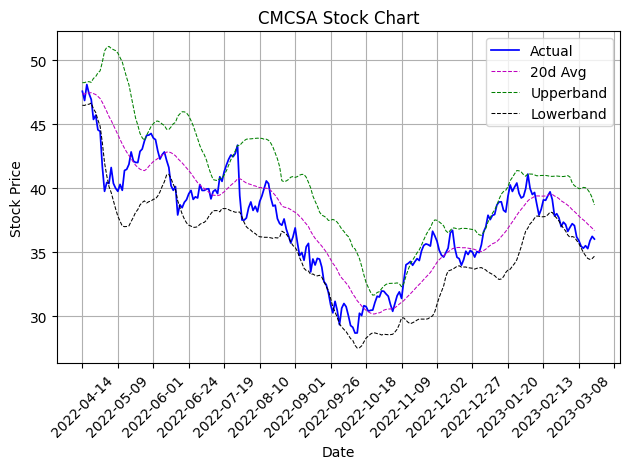

In [102]:
### Technical Indicators
ticker_symbol = 'CMCSA'

tech_indicators_csv_file_path = './data/technical_indicators.csv'

all_stock_df = pd.read_csv(tech_indicators_csv_file_path, header = 0)

stock_technical_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].drop('symbol', axis = 1).sort_values(by=['unix_time'])

ax = plt.axes()
ax.grid()
ax.set(xlabel='Date', ylabel='Stock Price', title=ticker_symbol + ' Stock Chart')

ax.plot(stock_technical_df['date'], stock_technical_df['close'], label='Actual', c='b', linewidth=1.25)
ax.plot(stock_technical_df['date'], stock_technical_df['middleband'], label='20d Avg', c='m', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['upperband'], label='Upperband', c='g', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['lowerband'], label='Lowerband', c='k', linewidth=.75, linestyle = 'dashed')

ax.xaxis.set_major_locator(mticker. MultipleLocator(16))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.legend()
plt.show()



future_date
1679011200
future_dates
[1679097600, 1679184000, 1679270400, 1679356800, 1679443200, 1679529600, 1679616000, 1679702400, 1679788800, 1679875200, 1679961600, 1680048000, 1680134400, 1680220800, 1680307200, 1680393600, 1680480000, 1680566400, 1680652800, 1680739200]
future_prediction
[38.76281338499947, 38.86359669980047, 38.70036959366131, 38.73132988933623, 38.67710602749116, 38.62682578965543, 38.73498090186646, 38.79695687130945, 38.77367869718666, 38.866735526059905, 38.76568201369215, 38.6338786948456, 38.55661093745591, 38.70698172011198, 38.81536126892829, 38.86970277470479, 39.03684249663602, 39.00170933838905, 39.00170933838905, 39.06801224426431]
future_prediction
[38.77928626 38.82181682 38.74467185 38.72205279 38.68972556 38.6523621
 38.71027882 38.7759193  38.78641451 38.83267902 38.77922554 38.66771257
 38.59720419 38.68120983 38.78675952 38.86591175 38.98860949 39.00538562
 39.00637645 39.04390389]


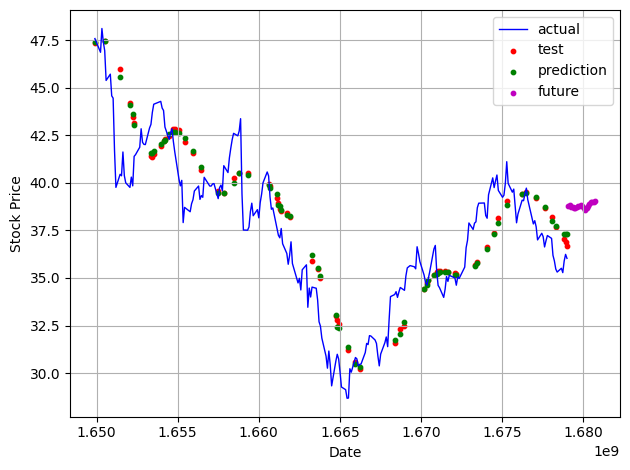

In [103]:

#### Attempted Future Prediction

data_x = stock_technical_df['unix_time']
data_y = stock_technical_df['middleband']

#x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=1) #20

x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test)

rforest = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rforest.fit(x_train, y_train)
    
prediction = rforest.predict(x_test)


future_date = int(stock_technical_df.tail(1)['unix_time'])
future_price = prediction[-1]

print("last date")
print(future_date)

future_dates=[]
future_predictions=[]


for idx in range(20):
    future_date = future_date + 86400
    future_dates.append(future_date)

    modifier = random.randint(-50, 50) / 10000 + 1
    future_price *= modifier
    future_predictions.append(future_price)

print("future_dates")
print(future_dates)

print("future_prediction")
print(future_predictions)

future_dates = np.array(future_dates).reshape(-1, 1)
future_predictions = np.array(future_predictions)

rforest.fit(future_dates, future_predictions)

future_prediction = rforest.predict(future_dates)

print("future_prediction")
print(future_prediction)

ax = plt.axes()
ax.grid()
ax.set(xlabel='Date', ylabel='Stock Price')

ax.plot(stock_technical_df['unix_time'], stock_technical_df['close'], label='actual', c='b', linewidth=1)
ax.scatter(x_test[:,0], y_test, label='test', c='r', s=10)
ax.scatter(x_test[:,0], prediction, label='prediction', c='g', s=10)
ax.scatter(future_dates[:,0], future_prediction, label='future', c='m', s=10)

plt.tight_layout()
plt.legend()
plt.show()